True
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([6])    class name:  frog
the shape of the image is:  torch.Size([3, 32, 32])


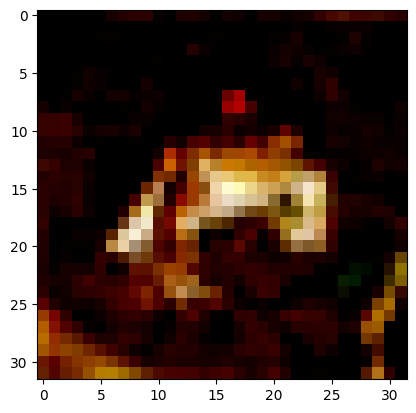

tensor([9])    class name:  truck
the shape of the image is:  torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


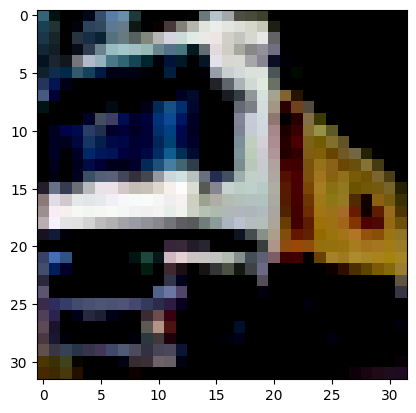

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([9])    class name:  truck
the shape of the image is:  torch.Size([3, 32, 32])


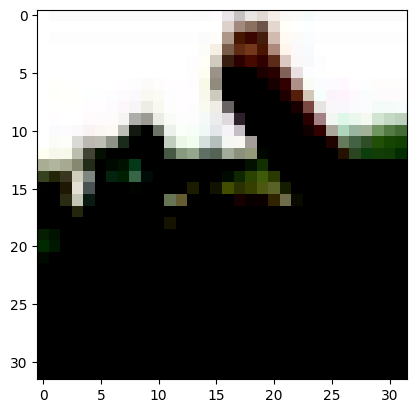

In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1)

cnt = 0
for image, label in train_loader:
    if cnt>=3:
        break
    print(label, '   class name: ', categories[label.item()])
    print('the shape of the image is: ', image[0].shape)
    
    img = image[0] # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
    img = img.numpy() # FloatTensor转为ndarray
    img = np.transpose(img, (1,2,0)) # 把channel那一维放到最后
    plt.imshow(img)
    plt.show()
    cnt += 1
    

In [2]:
# Learn the effect of conv, pool and fc layers
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

# convolution layer parameters:
# input_channel = 3, output_channel = 6, stride = 5
test_convolution_layer = nn.Conv2d(3, 6, 5) 

# max-pooling layer parameters:
# width = 2, height = 2
test_pooling_layer = nn.MaxPool2d(2,2) 

# fully-connected layer parameters:
# input_dim = 6*14*14, output = 10 classes
test_fully_connected_layer = nn.Linear(6*14*14, 10)

cnt = 0
for image, label in train_loader:
    
    # test the effect of convolutional layer
    print('the shape of the input of convolution layer is: ', image.shape)
    convolution_output = test_convolution_layer(image)
    print('the shape of the output of the convolution layer is: ', convolution_output.shape)
    # out_width = (32-5)/1+1 = 28
    
    print('\n\n')
    # test the effect of pooling layer
    print('the shape of the input of the pooling layer is: ', convolution_output.shape)
    pooling_layer_output = test_pooling_layer(convolution_output)
    print('the shape of the output of the convolution layer is: ', pooling_layer_output.shape)
    # out_width = 28/2 = 14
    
    # reshape each image into a vector
    fully_connected_layer_input = pooling_layer_output.view(-1, 6*14*14)
    print('the shape of reshape image is:', fully_connected_layer_input.shape)
    
    print('\n\n')
    # test the effect of fully-connected layer
    print('the shape of the input of the fully-connected layer is: ', fully_connected_layer_input.shape)
    fully_connected_layer_output = test_fully_connected_layer(fully_connected_layer_input)
    print('the shape of the output of the fully-connected layer is: ', fully_connected_layer_output.shape)
    
    break
    

Files already downloaded and verified
the shape of the input of convolution layer is:  torch.Size([64, 3, 32, 32])
the shape of the output of the convolution layer is:  torch.Size([64, 6, 28, 28])



the shape of the input of the pooling layer is:  torch.Size([64, 6, 28, 28])
the shape of the output of the convolution layer is:  torch.Size([64, 6, 14, 14])
the shape of reshape image is: torch.Size([64, 1176])



the shape of the input of the fully-connected layer is:  torch.Size([64, 1176])
the shape of the output of the fully-connected layer is:  torch.Size([64, 10])


In [ ]:
# Training stage
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# define the model structure
# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet, self).__init__()
        
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.relu = nn.ReLU()
#         self.pooling = nn.MaxPool2d(2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.linear1 = nn.Linear(400, 120)
#         self.linear2 = nn.Linear(120, 10)
    
#     def forward(self, x):
        
#         x = self.relu(self.conv1(x))
        
#         x = self.pooling(x)
        
#         x = self.relu(self.conv2(x))
        
#         x = self.pooling(x)
        
#         x = torch.flatten(x, 1)
        
#         x = self.linear1(x)
        
#         output = self.linear2(x)
        
#         return output

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5,120),
            nn.Linear(120, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x
    

# define the training dataset of this experiments
train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
# TODO:
# define the test set here by yourself
test_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=False,
                                          download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# TODO:
# convert your test set into a dataloader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

model = LeNet().to(device)
optimzer = optim.SGD(model.parameters(), lr=0.01)

# TODO:
# try different optimization methods, different learning rates
# optimzer = optim.Adam(model.parameters(), lr=0.02)

loss_function = nn.CrossEntropyLoss().to(device)
# TODO:
# try different loss functions


# 定义一个空列表来存储每个训练轮次的损失值
losses = []

# 定义训练轮次的数量
num_epochs = 100  # 你可以根据需要调整轮次数量
   

print("----训练开始----")  

# pred_correctness = outputs.argmax(dim=1).eq(label).sum().item()

# model.train()
# for epoch in range(num_epochs):
#     total_loss = 0
#     for img, label in train_loader:
#         img = img.to(device)
#         label = label.to(device)
        
#         output = model(img)
        
#         loss = loss_function(output, label)
#         total_loss += loss.item()
#         optimzer.zero_grad()
#         loss.backward()
#         optimzer.step()
        
#         pred_correctness = output.argmax(dim=1).eq(label).sum().item()
        
#     loss_ave = total_loss / len(train_loader)
#     print(f"Epoch [{epoch+1}/{num_epochs}] - Iteration Loss: {loss:.4f} - Average Loss: {loss_ave:.4f} - Precise Accuracy: {pred_correctness:.2f}")
# print("----训练完成----")  

model.train()

for epoch in range(num_epochs):
    total_loss = 0
    for image, label in train_loader:
        image = image.to(device)
        label = label.to(device)
        outputs = model(image)
        loss = loss_function(outputs, label)
        print(loss.item())
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        
        





model.train()

for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    
    for img, label in train_loader:
        img = img.to(device)
        label = label.to(device)
        
        optimzer.zero_grad()
        output = model(img)
        
        loss = loss_function(output, label)
        loss.backward()
        optimzer.step()
        
        pred_correctness = output.argmax(dim=1).eq(label).sum().item()
        total_acc += pred_correctness
        total_loss += loss.item()
    
    acc_ave = total_acc / len(train_loader)
    loss_ave = total_loss / len(train_loader)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Average Loss: {loss_ave:.4f}%")

print("----训练完成----")



# pred_correctness = output.argmax(dim=1).eq(labels).sum().item()

# accurate = 0
# model.eval()
# with torch.no_grad():
#     for img, label in test_loader:
        
#         img = img.to(device)
#         label = label.to(device)
#         output = model(img)
#         loss_in = loss_function(output, label)

#         sum_loss += loss_in
#         accurate += (output.argmax(1) == targets).sum()

Files already downloaded and verified
Files already downloaded and verified
----训练开始----
Epoch [1/100] - Average Loss: 2.1174 - Average Accuracy: 1.00%
Epoch [2/100] - Average Loss: 1.7780 - Average Accuracy: 9.00%
Epoch [3/100] - Average Loss: 1.6249 - Average Accuracy: 8.00%
Epoch [4/100] - Average Loss: 1.5190 - Average Accuracy: 6.00%
Epoch [5/100] - Average Loss: 1.4435 - Average Accuracy: 5.00%
Epoch [6/100] - Average Loss: 1.3939 - Average Accuracy: 9.00%
Epoch [7/100] - Average Loss: 1.3557 - Average Accuracy: 8.00%
Epoch [8/100] - Average Loss: 1.3255 - Average Accuracy: 9.00%
Epoch [9/100] - Average Loss: 1.2955 - Average Accuracy: 7.00%
Epoch [10/100] - Average Loss: 1.2671 - Average Accuracy: 12.00%
Epoch [11/100] - Average Loss: 1.2428 - Average Accuracy: 11.00%
Epoch [12/100] - Average Loss: 1.2191 - Average Accuracy: 10.00%
Epoch [13/100] - Average Loss: 1.1968 - Average Accuracy: 9.00%
Epoch [14/100] - Average Loss: 1.1829 - Average Accuracy: 11.00%
Epoch [15/100] - Ave

In [ ]:
model.eval()
correct = torch.zeros(10, device=device) #每个类别预测正确个数初始化
num = torch.zeros(10, device=device) #每个类别数目初始化
print("----测试开始----")
with torch.no_grad():
    for img, label in test_loader:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        if output.argmax(1) == label :
            correct[label] += 1 #若预测正确，对应类别+1
        num[label] += 1 #计算每一类的数目
        
accuracy = correct/num
print("每一个类别的正确率为：")
print(accuracy)

In [ ]:
# Error analysis:
pred = model(images)
def inference(pred, target):
    # TODO:
    # analysis the error samples
    pass